In [2]:
import sympy as sp
import sympy.vector as vc
from examples.ArtificialMusclesCases.muscle.muscle_fiber_init_symbolic import (
    get_fiber_geometry_symbolic_representation,
    get_fiber_geometry_based_on_symbolic_representation,
)
from examples.ArtificialMusclesCases import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
test_muscle = Samuel_supercoil_stl()
offset_list = [test_muscle.geometry.angular_offset,0]
# def centerline_f(s,N):
#     return sp.cos(10*s)*N.i + sp.sin(10*s)*N.j + 0*N.k

# def centerline_f(s,N):
#     return sp.sin(s)*N.i + sp.sin(s)*N.j + s*N.k
direction = np.array([0.0,1.0,0.0]) 

position_symbolic = get_fiber_geometry_symbolic_representation(
    test_muscle.geometry.start_radius_list,
    test_muscle.geometry.taper_slope_list,
    direction,
    offset_list,
    test_muscle.geometry.turns_per_length_list,
    test_muscle.geometry.CCW_list,)

100%|██████████| 2/2 [00:12<00:00,  6.02s/it]


In [3]:
muscle_length = test_muscle.geometry.muscle_length
n_elem = int(test_muscle.sim_settings.n_elem_per_coil*test_muscle.geometry.turns_per_length_list[0]*muscle_length)
fiber_length, start, position_collection, director_collection, intrinsic_link, injected_twist = get_fiber_geometry_based_on_symbolic_representation(
    position_symbolic,
    n_elem,
    test_muscle.geometry.start_radius_list,
    test_muscle.geometry.taper_slope_list,
    np.zeros(3),
    offset_list,
    muscle_length,
    np.array(test_muscle.geometry.turns_per_length_list),
    test_muscle.geometry.initial_link_per_fiber_length,
    test_muscle.geometry.CCW_list,
    check_twist_difference=False,
    )

Intrinsic_link_per_length:-224.95733479951718
Coil Twist = 52.21783100067464
Overall Twist/length = 546.8249208752712


In [5]:
position_collection.shape

(3, 424)

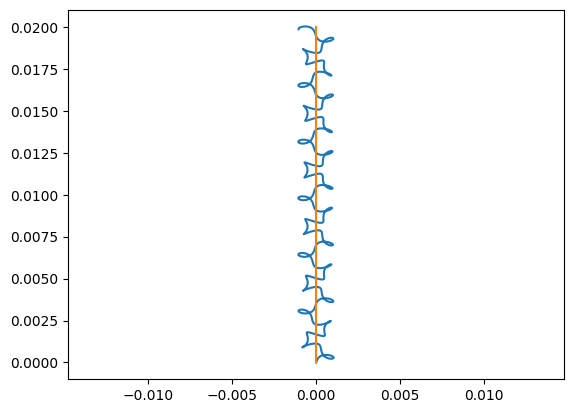

In [6]:
ax = plt.figure().add_subplot()
# ax = plt.figure().add_subplot(projection='3d')
# ax.plot(position_collection[0,:],position_collection[1,:],position_collection[2,:])
ax.plot(position_collection[0,:],position_collection[1,:])
s = sp.symbols("s")
N = vc.CoordSys3D("N")
def np_lambdify(varname, func):
    lamb = sp.lambdify(varname, func, modules=['numpy'])
    if func.is_constant():
        return lambda t: np.full_like(t, lamb(t))
    else:
        return lambda t: lamb(np.array(t))
centerline_x = np_lambdify(s,  s*(direction[0]*N.i+direction[1]*N.j+direction[2]*N.k) & N.i)
centerline_y = np_lambdify(s, s*(direction[0]*N.i+direction[1]*N.j+direction[2]*N.k) & N.j)
S = np.linspace(0,muscle_length,n_elem)
ax.plot(centerline_x(S),centerline_y(S))
ax.axis('equal')

plt.show()

In [19]:
from examples.ArtificialMusclesCases.muscle.muscle_utils import *
print(constant_radial_profile_with_straight_ends(0.05,10,1,1))

NameError: name 'constant_radial_profile_with_straight_ends' is not defined

In [3]:
x = np.linspace(0,1e-3,100)
y = np.zeros_like(x)
separation_distance = 5e-4
decay_factor = 2.5e-5
k = 0.02515939
y += k * x * (x <= separation_distance)
y += k * separation_distance * np.exp(-(x-separation_distance)/decay_factor)* (x > separation_distance)
plt.plot(x*1e3,y*1e9)
plt.xlabel("Distance (mm)", fontsize=16)
plt.ylabel("Force (nN)", fontsize=16)

NameError: name 'plt' is not defined